In [110]:
import matplotlib.pylab as plt
from sklearn import linear_model
import pandas as pd
import numpy as np

In [111]:
data = pd.read_csv("./분향가격동향.csv", encoding='cp949')
data.head(5)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [112]:
Gyeonggi_data = data[data['지역명'] == '경기']
Gyeonggi_data.head(5)

,지역명,규모구분,연도,월,분양가격(제곱미터)
10,경기,모든면적,2015,10,3138
11,경기,전용면적 60제곱미터이하,2015,10,3126
12,경기,전용면적 60제곱미터초과 85제곱미터이하,2015,10,3239
13,경기,전용면적 85제곱미터초과 102제곱미터이하,2015,10,3496
14,경기,전용면적 102제곱미터초과,2015,10,3680


In [113]:
Gyeonggi_data_60 = Gyeonggi_data[Gyeonggi_data['규모구분'] == '전용면적 60제곱미터이하']
Gyeonggi_data_60.head(5)

,지역명,규모구분,연도,월,분양가격(제곱미터)
11,경기,전용면적 60제곱미터이하,2015,10,3126
96,경기,전용면적 60제곱미터이하,2015,11,3079
181,경기,전용면적 60제곱미터이하,2015,12,3293
266,경기,전용면적 60제곱미터이하,2016,1,3293
351,경기,전용면적 60제곱미터이하,2016,2,3294


In [114]:
X_data = (Gyeonggi_data_60['연도'].values - 2015) * 12 + Gyeonggi_data_60['월'].values.astype('int64')
X_data, X_data.shape

(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102], dtype=int64),
 (93,))

In [115]:
y_data = Gyeonggi_data_60['분양가격(제곱미터)'].values.astype('int64')
y_data, y_data.shape

(array([3126, 3079, 3293, 3293, 3294, 3441, 3400, 3720, 3781, 3785, 3788,
        3444, 3508, 3650, 3602, 3609, 3652, 3773, 3812, 3628, 3671, 3707,
        3858, 3902, 3829, 3726, 3829, 4119, 4246, 4248, 4256, 4425, 4501,
        4578, 4459, 4384, 4365, 4331, 4439, 4440, 4444, 4200, 4185, 4465,
        4611, 4422, 4682, 4818, 4876, 4885, 4931, 4939, 4918, 4893, 4904,
        4326, 4258, 4279, 4108, 4124, 4127, 4129, 4051, 4056, 4071, 4068,
        4109, 4051, 4070, 4017, 4024, 4125, 4152, 4509, 4553, 4573, 4859,
        4891, 4821, 4986, 5142, 5138, 5202, 5435, 5476, 5318, 5622, 5873,
        5979, 5991, 6148, 6127, 6324], dtype=int64),
 (93,))

In [116]:
X_data = X_data.reshape(-1, 1)
X_data.shape, y_data.shape

((93, 1), (93,))

In [117]:
y_data.min(), y_data.max()

(3079, 6324)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.


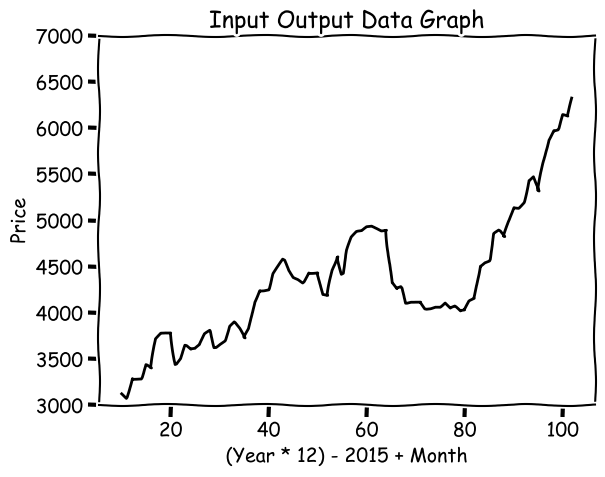

In [118]:
with plt.xkcd():
    plt.figure()
    plt.title("Input Output Data Graph")
    plt.xlabel("(Year * 12) - 2015 + Month")
    plt.ylabel("Price")
    plt.plot(X_data, y_data, color='black')
    plt.ylim(3000, 7000)
    plt.show()

In [119]:
reg = linear_model.LinearRegression()
reg.fit(X_data, y_data)

LinearRegression()

In [120]:
reg.coef_, reg.intercept_

(array([21.4969413]), 3153.9777386529804)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

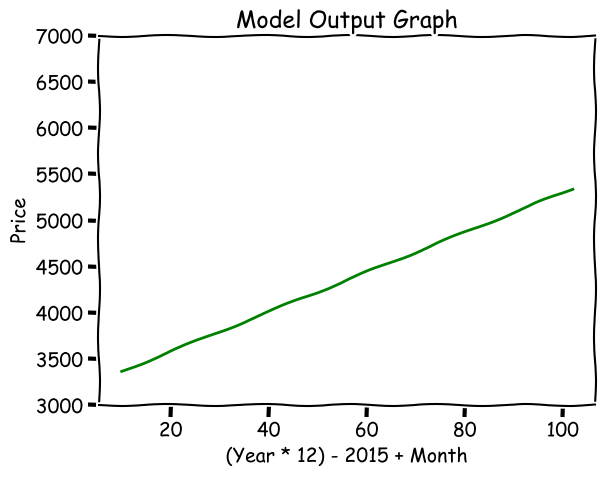

In [121]:
X = X_data
y = reg.coef_ * X_data + reg.intercept_

with plt.xkcd():
    plt.figure()
    plt.title("Model Output Graph")
    plt.xlabel("(Year * 12) - 2015 + Month")
    plt.ylabel("Price")
    plt.plot(X, y, color='green')
    plt.ylim(3000, 7000)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Fo

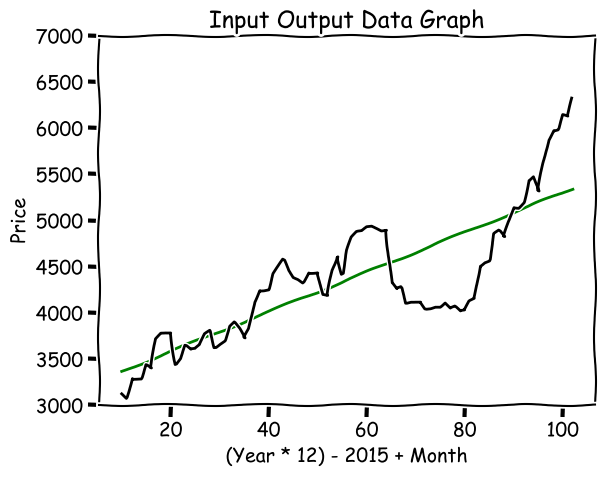

In [122]:
with plt.xkcd():
    plt.figure()
    plt.title("Input Output Data Graph")
    plt.xlabel("(Year * 12) - 2015 + Month")
    plt.ylabel("Price")
    plt.plot(X, y, color='green')
    plt.plot(X_data, y_data, color='black')
    plt.ylim(3000, 7000)
    plt.show()

In [123]:
year = np.array([[2023],[2024],[2025]])
month = np.array([[11],[11],[11]])
X_test = (year - 2015) * 12 + month

y_pred = reg.predict(X_test)
y_pred

array([5454.15045806, 5712.11375369, 5970.07704933])

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Fo

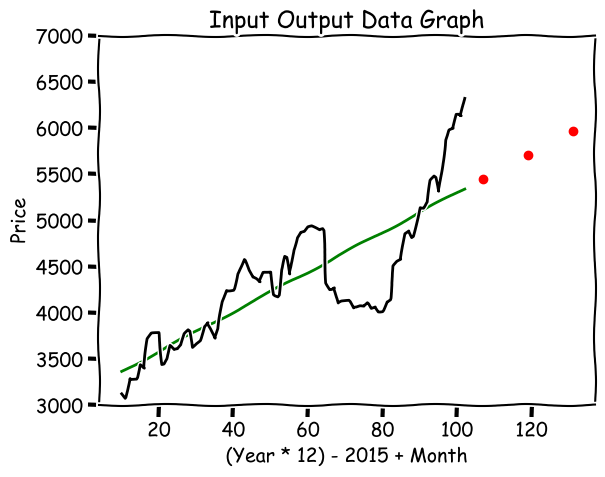

In [124]:
with plt.xkcd():
    plt.figure()
    plt.title("Input Output Data Graph")
    plt.xlabel("(Year * 12) - 2015 + Month")
    plt.ylabel("Price")
    plt.scatter(X_test, y_pred, color='red')
    plt.plot(X, y, color='green')
    plt.plot(X_data, y_data, color='black')
    plt.ylim(3000, 7000)
    plt.show()